# Unsupervised Learning in Python

### Course Description
Say you have a collection of customers with a variety of characteristics such as age, location, and financial history, and you wish to discover patterns and sort them into clusters. Or perhaps you have a set of texts, such as wikipedia pages, and you wish to segment them into categories based on their content. This is the world of unsupervised learning, called as such because you are not guiding, or supervising, the pattern discovery by some prediction task, but instead uncovering hidden structure from unlabeled data. Unsupervised learning encompasses a variety of techniques in machine learning, from clustering to dimension reduction to matrix factorization. In this course, you'll learn the fundamentals of unsupervised learning and implement the essential algorithms using scikit-learn and scipy. You will learn how to cluster, transform, visualize, and extract insights from unlabeled datasets, and end the course by building a recommender system to recommend popular musical artists.

## 1. Clustering for dataset exploration

Learn how to discover the underlying groups (or "clusters") in a dataset. By the end of this chapter, you'll be clustering companies using their stock market prices, and distinguishing different species by clustering their measurements.

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd

from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, Normalizer, normalize
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA,TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer


from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from scipy.stats import pearsonr





In [2]:
points  = np.array([[ 0.06544649, -0.76866376],
       [-1.52901547, -0.42953079],
       [ 1.70993371,  0.69885253],
       [ 1.16779145,  1.01262638],
       [-1.80110088, -0.31861296],
       [-1.63567888, -0.02859535],
       [ 1.21990375,  0.74643463],
       [-0.26175155, -0.62492939],
       [-1.61925804, -0.47983949],
       [-1.84329582, -0.16694431],
       [ 1.35999602,  0.94995827],
       [ 0.42291856, -0.7349534 ],
       [-1.68576139,  0.10686728],
       [ 0.90629995,  1.09105162],
       [-1.56478322, -0.84675394],
       [-0.0257849 , -1.18672539],
       [ 0.83027324,  1.14504612],
       [ 1.22450432,  1.35066759],
       [-0.15394596, -0.71704301],
       [ 0.86358809,  1.06824613],
       [-1.43386366, -0.2381297 ],
       [ 0.03844769, -0.74635022],
       [-1.58567922,  0.08499354],
       [ 0.6359888 , -0.58477698],
       [ 0.24417242, -0.53172465],
       [-2.19680359,  0.49473677],
       [ 1.0323503 , -0.55688   ],
       [-0.28858067, -0.39972528],
       [ 0.20597008, -0.80171536],
       [-1.2107308 , -0.34924109],
       [ 1.33423684,  0.7721489 ],
       [ 1.19480152,  1.04788556],
       [ 0.9917477 ,  0.89202008],
       [-1.8356219 , -0.04839732],
       [ 0.08415721, -0.71564326],
       [-1.48970175, -0.19299604],
       [ 0.38782418, -0.82060119],
       [-0.01448044, -0.9779841 ],
       [-2.0521341 , -0.02129125],
       [ 0.10331194, -0.82162781],
       [-0.44189315, -0.65710974],
       [ 1.10390926,  1.02481182],
       [-1.59227759, -0.17374038],
       [-1.47344152, -0.02202853],
       [-1.35514704,  0.22971067],
       [ 0.0412337 , -1.23776622],
       [ 0.4761517 , -1.13672124],
       [ 1.04335676,  0.82345905],
       [-0.07961882, -0.85677394],
       [ 0.87065059,  1.08052841],
       [ 1.40267313,  1.07525119],
       [ 0.80111157,  1.28342825],
       [-0.16527516, -1.23583804],
       [-0.33779221, -0.59194323],
       [ 0.80610749, -0.73752159],
       [-1.43590032, -0.56384446],
       [ 0.54868895, -0.95143829],
       [ 0.46803131, -0.74973907],
       [-1.5137129 , -0.83914323],
       [ 0.9138436 ,  1.51126532],
       [-1.97233903, -0.41155375],
       [ 0.5213406 , -0.88654894],
       [ 0.62759494, -1.18590477],
       [ 0.94163014,  1.35399335],
       [ 0.56994768,  1.07036606],
       [-1.87663382,  0.14745773],
       [ 0.90612186,  0.91084011],
       [-1.37481454,  0.28428395],
       [-1.80564029, -0.96710574],
       [ 0.34307757, -0.79999275],
       [ 0.70380566,  1.00025804],
       [-1.68489862, -0.30564595],
       [ 1.31473221,  0.98614978],
       [ 0.26151216, -0.26069251],
       [ 0.9193121 ,  0.82371485],
       [-1.21795929, -0.20219674],
       [-0.17722723, -1.02665245],
       [ 0.64824862, -0.66822881],
       [ 0.41206786, -0.28783784],
       [ 1.01568202,  1.13481667],
       [ 0.67900254, -0.91489502],
       [-1.05182747, -0.01062376],
       [ 0.61306599,  1.78210384],
       [-1.50219748, -0.52308922],
       [-1.72717293, -0.46173916],
       [-1.60995631, -0.1821007 ],
       [-1.09111021, -0.0781398 ],
       [-0.01046978, -0.80913034],
       [ 0.32782303, -0.80734754],
       [ 1.22038503,  1.1959793 ],
       [-1.33328681, -0.30001937],
       [ 0.87959517,  1.11566491],
       [-1.14829098, -0.30400762],
       [-0.58019755, -1.19996018],
       [-0.01161159, -0.78468854],
       [ 0.17359724, -0.63398145],
       [ 1.32738556,  0.67759969],
       [-1.93467327,  0.30572472],
       [-1.57761893, -0.27726365],
       [ 0.47639   ,  1.21422648],
       [-1.65237509, -0.6803981 ],
       [-0.12609976, -1.04327457],
       [-1.89607082, -0.70085502],
       [ 0.57466899,  0.74878369],
       [-0.16660312, -0.83110295],
       [ 0.8013355 ,  1.22244435],
       [ 1.18455426,  1.4346467 ],
       [ 1.08864428,  0.64667112],
       [-1.61158505,  0.22805725],
       [-1.57512205, -0.09612576],
       [ 0.0721357 , -0.69640328],
       [-1.40054298,  0.16390598],
       [ 1.09607713,  1.16804691],
       [-2.54346204, -0.23089822],
       [-1.34544875,  0.25151126],
       [-1.35478629, -0.19103317],
       [ 0.18368113, -1.15827725],
       [-1.31368677, -0.376357  ],
       [ 0.09990129,  1.22500491],
       [ 1.17225574,  1.30835143],
       [ 0.0865397 , -0.79714371],
       [-0.21053923, -1.13421511],
       [ 0.26496024, -0.94760742],
       [-0.2557591 , -1.06266022],
       [-0.26039757, -0.74774225],
       [-1.91787359,  0.16434571],
       [ 0.93021139,  0.49436331],
       [ 0.44770467, -0.72877918],
       [-1.63802869, -0.58925528],
       [-1.95712763, -0.10125137],
       [ 0.9270337 ,  0.88251423],
       [ 1.25660093,  0.60828073],
       [-1.72818632,  0.08416887],
       [ 0.3499788 , -0.30490298],
       [-1.51696082, -0.50913109],
       [ 0.18763605, -0.55424924],
       [ 0.89609809,  0.83551508],
       [-1.54968857, -0.17114782],
       [ 1.2157457 ,  1.23317728],
       [ 0.20307745, -1.03784906],
       [ 0.84589086,  1.03615273],
       [ 0.53237919,  1.47362884],
       [-0.05319044, -1.36150553],
       [ 1.38819743,  1.11729915],
       [ 1.00696304,  1.0367721 ],
       [ 0.56681869, -1.09637176],
       [ 0.86888296,  1.05248874],
       [-1.16286609, -0.55875245],
       [ 0.27717768, -0.83844015],
       [ 0.16563267, -0.80306607],
       [ 0.38263303, -0.42683241],
       [ 1.14519807,  0.89659026],
       [ 0.81455857,  0.67533667],
       [-1.8603152 , -0.09537561],
       [ 0.965641  ,  0.90295579],
       [-1.49897451, -0.33254044],
       [-0.1335489 , -0.80727582],
       [ 0.12541527, -1.13354906],
       [ 1.06062436,  1.28816358],
       [-1.49154578, -0.2024641 ],
       [ 1.16189032,  1.28819877],
       [ 0.54282033,  0.75203524],
       [ 0.89221065,  0.99211624],
       [-1.49932011, -0.32430667],
       [ 0.3166647 , -1.34482915],
       [ 0.13972469, -1.22097448],
       [-1.5499724 , -0.10782584],
       [ 1.23846858,  1.37668804],
       [ 1.25558954,  0.72026098],
       [ 0.25558689, -1.28529763],
       [ 0.45168933, -0.55952093],
       [ 1.06202057,  1.03404604],
       [ 0.67451908, -0.54970299],
       [ 0.22759676, -1.02729468],
       [-1.45835281, -0.04951074],
       [ 0.23273501, -0.70849262],
       [ 1.59679589,  1.11395076],
       [ 0.80476105,  0.544627  ],
       [ 1.15492521,  1.04352191],
       [ 0.59632776, -1.19142897],
       [ 0.02839068, -0.43829366],
       [ 1.13451584,  0.5632633 ],
       [ 0.21576204, -1.04445753],
       [ 1.41048987,  1.02830719],
       [ 1.12289302,  0.58029441],
       [ 0.25200688, -0.82588436],
       [-1.28566081, -0.07390909],
       [ 1.52849815,  1.11822469],
       [-0.23907858, -0.70541972],
       [-0.25792784, -0.81825035],
       [ 0.59367818, -0.45239915],
       [ 0.07931909, -0.29233213],
       [-1.27256815,  0.11630577],
       [ 0.66930129,  1.00731481],
       [ 0.34791546, -1.20822877],
       [-2.11283993, -0.66897935],
       [-1.6293824 , -0.32718222],
       [-1.53819139, -0.01501972],
       [-0.11988545, -0.6036339 ],
       [-1.54418956, -0.30389844],
       [ 0.30026614, -0.77723173],
       [ 0.00935449, -0.53888192],
       [-1.33424393, -0.11560431],
       [ 0.47504489,  0.78421384],
       [ 0.59313264,  1.232239  ],
       [ 0.41370369, -1.35205857],
       [ 0.55840948,  0.78831053],
       [ 0.49855018, -0.789949  ],
       [ 0.35675809, -0.81038693],
       [-1.86197825, -0.59071305],
       [-1.61977671, -0.16076687],
       [ 0.80779295, -0.73311294],
       [ 1.62745775,  0.62787163],
       [-1.56993593, -0.08467567],
       [ 1.02558561,  0.89383302],
       [ 0.24293461, -0.6088253 ],
       [ 1.23130242,  1.00262186],
       [-1.9651013 , -0.15886289],
       [ 0.42795032, -0.70384432],
       [-1.58306818, -0.19431923],
       [-1.57195922,  0.01413469],
       [-0.98145373,  0.06132285],
       [-1.48637844, -0.5746531 ],
       [ 0.98745828,  0.69188053],
       [ 1.28619721,  1.28128821],
       [ 0.85850596,  0.95541481],
       [ 0.19028286, -0.82112942],
       [ 0.26561046, -0.04255239],
       [-1.61897897,  0.00862372],
       [ 0.24070183, -0.52664209],
       [ 1.15220993,  0.43916694],
       [-1.21967812, -0.2580313 ],
       [ 0.33412533, -0.86117761],
       [ 0.17131003, -0.75638965],
       [-1.19828397, -0.73744665],
       [-0.12245932, -0.45648879],
       [ 1.51200698,  0.88825741],
       [ 1.10338866,  0.92347479],
       [ 1.30972095,  0.59066989],
       [ 0.19964876,  1.14855889],
       [ 0.81460515,  0.84538972],
       [-1.6422739 , -0.42296206],
       [ 0.01224351, -0.21247816],
       [ 0.33709102, -0.74618065],
       [ 0.47301054,  0.72712075],
       [ 0.34706626,  1.23033757],
       [-0.00393279, -0.97209694],
       [-1.64303119,  0.05276337],
       [ 1.44649625,  1.14217033],
       [-1.93030087, -0.40026146],
       [-2.37296135, -0.72633645],
       [ 0.45860122, -1.06048953],
       [ 0.4896361 , -1.18928313],
       [-1.02335902, -0.17520578],
       [-1.32761107, -0.93963549],
       [-1.50987909, -0.09473658],
       [ 0.02723057, -0.79870549],
       [ 1.0169412 ,  1.26461701],
       [ 0.47733527, -0.9898471 ],
       [-1.27784224, -0.547416  ],
       [ 0.49898802, -0.6237259 ],
       [ 1.06004731,  0.86870008],
       [ 1.00207501,  1.38293512],
       [ 1.31161394,  0.62833956],
       [ 1.13428443,  1.18346542],
       [ 1.27671346,  0.96632878],
       [-0.63342885, -0.97768251],
       [ 0.12698779, -0.93142317],
       [-1.34510812, -0.23754226],
       [-0.53162278, -1.25153594],
       [ 0.21959934, -0.90269938],
       [-1.78997479, -0.12115748],
       [ 1.23197473, -0.07453764],
       [ 1.4163536 ,  1.21551752],
       [-1.90280976, -0.1638976 ],
       [-0.22440081, -0.75454248],
       [ 0.59559412,  0.92414553],
       [ 1.21930773,  1.08175284],
       [-1.99427535, -0.37587799],
       [-1.27818474, -0.52454551],
       [ 0.62352689, -1.01430108],
       [ 0.14024251, -0.428266  ],
       [-0.16145713, -1.16359731],
       [-1.74795865, -0.06033101],
       [-1.16659791,  0.0902393 ],
       [ 0.41110408, -0.8084249 ],
       [ 1.14757168,  0.77804528],
       [-1.65590748, -0.40105446],
       [-1.15306865,  0.00858699],
       [ 0.60892121,  0.68974833],
       [-0.08434138, -0.97615256],
       [ 0.19170053, -0.42331438],
       [ 0.29663162, -1.13357399],
       [-1.36893628, -0.25052124],
       [-0.08037807, -0.56784155],
       [ 0.35695011, -1.15064408],
       [ 0.02482179, -0.63594828],
       [-1.49075558, -0.2482507 ],
       [-1.408588  ,  0.25635431],
       [-1.98274626, -0.54584475]])

new_points = np.array([[ 4.00233332e-01, -1.26544471e+00],
       [ 8.03230370e-01,  1.28260167e+00],
       [-1.39507552e+00,  5.57292921e-02],
       [-3.41192677e-01, -1.07661994e+00],
       [ 1.54781747e+00,  1.40250049e+00],
       [ 2.45032018e-01, -4.83442328e-01],
       [ 1.20706886e+00,  8.88752605e-01],
       [ 1.25132628e+00,  1.15555395e+00],
       [ 1.81004415e+00,  9.65530731e-01],
       [-1.66963401e+00, -3.08103509e-01],
       [-7.17482105e-02, -9.37939700e-01],
       [ 6.82631927e-01,  1.10258160e+00],
       [ 1.09039598e+00,  1.43899529e+00],
       [-1.67645414e+00, -5.04557049e-01],
       [-1.84447804e+00,  4.52539544e-02],
       [ 1.24234851e+00,  1.02088661e+00],
       [-1.86147041e+00,  6.38645811e-03],
       [-1.46044943e+00,  1.53252383e-01],
       [ 4.98981817e-01,  8.98006058e-01],
       [ 9.83962244e-01,  1.04369375e+00],
       [-1.83136742e+00, -1.63632835e-01],
       [ 1.30622617e+00,  1.07658717e+00],
       [ 3.53420328e-01, -7.51320218e-01],
       [ 1.13957970e+00,  1.54503860e+00],
       [ 2.93995694e-01, -1.26135005e+00],
       [-1.14558225e+00, -3.78709636e-02],
       [ 1.18716105e+00,  6.00240663e-01],
       [-2.23211946e+00,  2.30475094e-01],
       [-1.28320430e+00, -3.93314568e-01],
       [ 4.94296696e-01, -8.83972009e-01],
       [ 6.31834930e-02, -9.11952228e-01],
       [ 9.35759539e-01,  8.66820685e-01],
       [ 1.58014721e+00,  1.03788392e+00],
       [ 1.06304960e+00,  1.02706082e+00],
       [-1.39732536e+00, -5.05162249e-01],
       [-1.09935240e-01, -9.08113619e-01],
       [ 1.17346758e+00,  9.47501092e-01],
       [ 9.20084511e-01,  1.45767672e+00],
       [ 5.82658956e-01, -9.00086832e-01],
       [ 9.52772328e-01,  8.99042386e-01],
       [-1.37266956e+00, -3.17878215e-02],
       [ 2.12706760e-02, -7.07614194e-01],
       [ 3.27049052e-01, -5.55998107e-01],
       [-1.71590267e+00,  2.15222266e-01],
       [ 5.12516209e-01, -7.60128245e-01],
       [ 1.13023469e+00,  7.22451122e-01],
       [-1.43074310e+00, -3.42787511e-01],
       [-1.82724625e+00,  1.17657775e-01],
       [ 1.41801350e+00,  1.11455080e+00],
       [ 1.26897304e+00,  1.41925971e+00],
       [ 8.04076494e-01,  1.63988557e+00],
       [ 8.34567752e-01,  1.09956689e+00],
       [-1.24714732e+00, -2.23522320e-01],
       [-1.29422537e+00,  8.18770024e-02],
       [-2.27378316e-01, -4.13331387e-01],
       [ 2.18830387e-01, -4.68183120e-01],
       [-1.22593414e+00,  2.55599147e-01],
       [-1.31294033e+00, -4.28892070e-01],
       [-1.33532382e+00,  6.52053776e-01],
       [-3.01100233e-01, -1.25156451e+00],
       [ 2.02778356e-01, -9.05277445e-01],
       [ 1.01357784e+00,  1.12378981e+00],
       [ 8.18324394e-01,  8.60841257e-01],
       [ 1.26181556e+00,  1.46613744e+00],
       [ 4.64867724e-01, -7.97212459e-01],
       [ 3.60908898e-01,  8.44106720e-01],
       [-2.15098310e+00, -3.69583937e-01],
       [ 1.05005281e+00,  8.74181364e-01],
       [ 1.06580074e-01, -7.49268153e-01],
       [-1.73945723e+00,  2.52183577e-01],
       [-1.12017687e-01, -6.52469788e-01],
       [ 5.16618951e-01, -6.41267582e-01],
       [ 3.26621787e-01, -8.80608015e-01],
       [ 1.09017759e+00,  1.10952558e+00],
       [ 3.64459576e-01, -6.94215622e-01],
       [-1.90779318e+00,  1.87383674e-01],
       [-1.95601829e+00,  1.39959126e-01],
       [ 3.18541701e-01, -4.05271704e-01],
       [ 7.36512699e-01,  1.76416255e+00],
       [-1.44175162e+00, -5.72320429e-02],
       [ 3.21757168e-01, -5.34283821e-01],
       [-1.37317305e+00,  4.64484644e-02],
       [ 6.87225910e-02, -1.10522944e+00],
       [ 9.59314218e-01,  6.52316210e-01],
       [-1.62641919e+00, -5.62423280e-01],
       [ 1.06788305e+00,  7.29260482e-01],
       [-1.79643547e+00, -9.88307418e-01],
       [-9.88628377e-02, -6.81198092e-02],
       [-1.05135700e-01,  1.17022143e+00],
       [ 8.79964699e-01,  1.25340317e+00],
       [ 9.80753407e-01,  1.15486539e+00],
       [-8.33224966e-02, -9.24844368e-01],
       [ 8.48759673e-01,  1.09397425e+00],
       [ 1.32941649e+00,  1.13734563e+00],
       [ 3.23788068e-01, -7.49732451e-01],
       [-1.52610970e+00, -2.49016929e-01],
       [-1.48598116e+00, -2.68828608e-01],
       [-1.80479553e+00,  1.87052700e-01],
       [-2.01907347e+00, -4.49511651e-01],
       [ 2.87202402e-01, -6.55487415e-01],
       [ 8.22295102e-01,  1.38443234e+00],
       [-3.56997036e-02, -8.01825807e-01],
       [-1.66955440e+00, -1.38258505e-01],
       [-1.78226821e+00,  2.93353033e-01],
       [ 7.25837138e-01, -6.23374024e-01],
       [ 3.88432593e-01, -7.61283497e-01],
       [ 1.49002783e+00,  7.95678671e-01],
       [ 6.55423228e-04, -7.40580702e-01],
       [-1.34533116e+00, -4.75629937e-01],
       [-8.03845106e-01, -3.09943013e-01],
       [-2.49041295e-01, -1.00662418e+00],
       [-1.41095118e+00, -7.06744127e-02],
       [-1.75119594e+00, -3.00491336e-01],
       [-1.27942724e+00,  1.73774600e-01],
       [ 3.35028183e-01,  6.24761151e-01],
       [ 1.16819649e+00,  1.18902251e+00],
       [ 7.15210457e-01,  9.26077419e-01],
       [ 1.30057278e+00,  9.16349565e-01],
       [-1.21697008e+00,  1.10039477e-01],
       [-1.70707935e+00, -5.99659536e-02],
       [ 1.20730655e+00,  1.05480463e+00],
       [ 1.86896009e-01, -9.58047234e-01],
       [ 8.03463471e-01,  3.86133140e-01],
       [-1.73486790e+00, -1.49831913e-01],
       [ 1.31261499e+00,  1.11802982e+00],
       [ 4.04993148e-01, -5.10900347e-01],
       [-1.93267968e+00,  2.20764694e-01],
       [ 6.56004799e-01,  9.61887161e-01],
       [-1.40588215e+00,  1.17134403e-01],
       [-1.74306264e+00, -7.47473959e-02],
       [ 5.43745412e-01,  1.47209224e+00],
       [-1.97331669e+00, -2.27124493e-01],
       [ 1.53901171e+00,  1.36049081e+00],
       [-1.48323452e+00, -4.90302063e-01],
       [ 3.86748484e-01, -1.26173400e+00],
       [ 1.17015716e+00,  1.18549415e+00],
       [-8.05381721e-02, -3.21923627e-01],
       [-6.82273156e-02, -8.52825887e-01],
       [ 7.13500028e-01,  1.27868520e+00],
       [-1.85014378e+00, -5.03490558e-01],
       [ 6.36085266e-02, -1.41257040e+00],
       [ 1.52966062e+00,  9.66056572e-01],
       [ 1.62165714e-01, -1.37374843e+00],
       [-3.23474497e-01, -7.06620269e-01],
       [-1.51768993e+00,  1.87658302e-01],
       [ 8.88895911e-01,  7.62237161e-01],
       [ 4.83164032e-01,  8.81931869e-01],
       [-5.52997766e-02, -7.11305016e-01],
       [-1.57966441e+00, -6.29220313e-01],
       [ 5.51308645e-02, -8.47206763e-01],
       [-2.06001582e+00,  5.87697787e-02],
       [ 1.11810855e+00,  1.30254175e+00],
       [ 4.87016164e-01, -9.90143937e-01],
       [-1.65518042e+00, -1.69386383e-01],
       [-1.44349738e+00,  1.90299243e-01],
       [-1.70074547e-01, -8.26736022e-01],
       [-1.82433979e+00, -3.07814626e-01],
       [ 1.03093485e+00,  1.26457691e+00],
       [ 1.64431169e+00,  1.27773115e+00],
       [-1.47617693e+00,  2.60783872e-02],
       [ 1.00953067e+00,  1.14270181e+00],
       [-1.45285636e+00, -2.55216207e-01],
       [-1.74092917e+00, -8.34443177e-02],
       [ 1.22038299e+00,  1.28699961e+00],
       [ 9.16925397e-01,  7.32070275e-01],
       [-1.60754185e-03, -7.26375571e-01],
       [ 8.93841238e-01,  8.41146643e-01],
       [ 6.33791961e-01,  1.00915134e+00],
       [-1.47927075e+00, -6.99781936e-01],
       [ 5.44799374e-02, -1.06441970e+00],
       [-1.51935568e+00, -4.89276929e-01],
       [ 2.89939026e-01, -7.73145523e-01],
       [-9.68154061e-03, -1.13302207e+00],
       [ 1.13474639e+00,  9.71541744e-01],
       [ 5.36421406e-01, -8.47906388e-01],
       [ 1.14759864e+00,  6.89915205e-01],
       [ 5.73291902e-01,  7.90802710e-01],
       [ 2.12377397e-01, -6.07569808e-01],
       [ 5.26579548e-01, -8.15930264e-01],
       [-2.01831641e+00,  6.78650740e-02],
       [-2.35512624e-01, -1.08205132e+00],
       [ 1.59274780e-01, -6.00717261e-01],
       [ 2.28120356e-01, -1.16003549e+00],
       [-1.53658378e+00,  8.40798808e-02],
       [ 1.13954609e+00,  6.31782001e-01],
       [ 1.01119255e+00,  1.04360805e+00],
       [-1.42039867e-01, -4.81230337e-01],
       [-2.23120182e+00,  8.49162905e-02],
       [ 1.25554811e-01, -1.01794793e+00],
       [-1.72493509e+00, -6.94426177e-01],
       [-1.60434630e+00,  4.45550868e-01],
       [ 7.37153979e-01,  9.26560744e-01],
       [ 6.72905271e-01,  1.13366030e+00],
       [ 1.20066456e+00,  7.26273093e-01],
       [ 7.58747209e-02, -9.83378326e-01],
       [ 1.28783262e+00,  1.18088601e+00],
       [ 1.06521930e+00,  1.00714746e+00],
       [ 1.05871698e+00,  1.12956519e+00],
       [-1.12643410e+00,  1.66787744e-01],
       [-1.10157218e+00, -3.64137806e-01],
       [ 2.35118217e-01, -1.39769949e-01],
       [ 1.13853795e+00,  1.01018519e+00],
       [ 5.31205654e-01, -8.81990792e-01],
       [ 4.33085936e-01, -7.64059042e-01],
       [-4.48926156e-03, -1.30548411e+00],
       [-1.76348589e+00, -4.97430739e-01],
       [ 1.36485681e+00,  5.83404699e-01],
       [ 5.66923900e-01,  1.51391963e+00],
       [ 1.35736826e+00,  6.70915318e-01],
       [ 1.07173397e+00,  6.11990884e-01],
       [ 1.00106915e+00,  8.93815326e-01],
       [ 1.33091007e+00,  8.79773879e-01],
       [-1.79603740e+00, -3.53883973e-02],
       [-1.27222979e+00,  4.00156642e-01],
       [ 8.47480603e-01,  1.17032364e+00],
       [-1.50989129e+00, -7.12318330e-01],
       [-1.24953576e+00, -5.57859730e-01],
       [-1.27717973e+00, -5.99350550e-01],
       [-1.81946743e+00,  7.37057673e-01],
       [ 1.19949867e+00,  1.56969386e+00],
       [-1.25543847e+00, -2.33892826e-01],
       [-1.63052058e+00,  1.61455865e-01],
       [ 1.10611305e+00,  7.39698224e-01],
       [ 6.70193192e-01,  8.70567001e-01],
       [ 3.69670156e-01, -6.94645306e-01],
       [-1.26362293e+00, -6.99249285e-01],
       [-3.66687507e-01, -1.35310260e+00],
       [ 2.44032147e-01, -6.59470793e-01],
       [-1.27679142e+00, -4.85453412e-01],
       [ 3.77473612e-02, -6.99251605e-01],
       [-2.19148539e+00, -4.91199500e-01],
       [-2.93277777e-01, -5.89488212e-01],
       [-1.65737397e+00, -2.98337786e-01],
       [ 7.36638861e-01,  5.78037057e-01],
       [ 1.13709081e+00,  1.30119754e+00],
       [-1.44146601e+00,  3.13934680e-02],
       [ 5.92360708e-01,  1.22545114e+00],
       [ 6.51719414e-01,  4.92674894e-01],
       [ 5.94559139e-01,  8.25637315e-01],
       [-1.87900722e+00, -5.21899626e-01],
       [ 2.15225041e-01, -1.28269851e+00],
       [ 4.99145965e-01, -6.70268634e-01],
       [-1.82954176e+00, -3.39269731e-01],
       [ 7.92721403e-01,  1.33785606e+00],
       [ 9.54363372e-01,  9.80396626e-01],
       [-1.35359846e+00,  1.03976340e-01],
       [ 1.05595062e+00,  8.07031927e-01],
       [-1.94311010e+00, -1.18976964e-01],
       [-1.39604137e+00, -3.10095976e-01],
       [ 1.28977624e+00,  1.01753365e+00],
       [-1.59503139e+00, -5.40574609e-01],
       [-1.41994046e+00, -3.81032569e-01],
       [-2.35569801e-02, -1.10133702e+00],
       [-1.26038568e+00, -6.93273886e-01],
       [ 9.60215981e-01, -8.11553694e-01],
       [ 5.51803308e-01, -1.01793176e+00],
       [ 3.70185085e-01, -1.06885468e+00],
       [ 8.25529207e-01,  8.77007060e-01],
       [-1.87032595e+00,  2.87507199e-01],
       [-1.56260769e+00, -1.89196712e-01],
       [-1.26346548e+00, -7.74725237e-01],
       [-6.33800421e-02, -7.59400611e-01],
       [ 8.85298280e-01,  8.85620519e-01],
       [-1.43324686e-01, -1.16083678e+00],
       [-1.83908725e+00, -3.26655515e-01],
       [ 2.74709229e-01, -1.04546829e+00],
       [-1.45703573e+00, -2.91842036e-01],
       [-1.59048842e+00,  1.66063031e-01],
       [ 9.25549284e-01,  7.41406406e-01],
       [ 1.97245469e-01, -7.80703225e-01],
       [ 2.88401697e-01, -8.32425551e-01],
       [ 7.24141618e-01, -7.99149200e-01],
       [-1.62658639e+00, -1.80005543e-01],
       [ 5.84481588e-01,  1.13195640e+00],
       [ 1.02146732e+00,  4.59657799e-01],
       [ 8.65050554e-01,  9.57714887e-01],
       [ 3.98717766e-01, -1.24273147e+00],
       [ 8.62234892e-01,  1.10955561e+00],
       [-1.35999430e+00,  2.49942654e-02],
       [-1.19178505e+00, -3.82946323e-02],
       [ 1.29392424e+00,  1.10320509e+00],
       [ 1.25679630e+00, -7.79857582e-01],
       [ 9.38040302e-02, -5.53247258e-01],
       [-1.73512175e+00, -9.76271667e-02],
       [ 2.23153587e-01, -9.43474351e-01],
       [ 4.01989100e-01, -1.10963051e+00],
       [-1.42244158e+00,  1.81914703e-01],
       [ 3.92476267e-01, -8.78426277e-01],
       [ 1.25181875e+00,  6.93614996e-01],
       [ 1.77481317e-02, -7.20304235e-01],
       [-1.87752521e+00, -2.63870424e-01],
       [-1.58063602e+00, -5.50456344e-01],
       [-1.59589493e+00, -1.53932892e-01],
       [-1.01829770e+00,  3.88542370e-02],
       [ 1.24819659e+00,  6.60041803e-01],
       [-1.25551377e+00, -2.96172009e-02],
       [-1.41864559e+00, -3.58230179e-01],
       [ 5.25758326e-01,  8.70500543e-01],
       [ 5.55599988e-01,  1.18765072e+00],
       [ 2.81344439e-02, -6.99111314e-01]])

### Clustering 2D points
From the scatter plot of the previous exercise, you saw that the points seem to separate into 3 clusters. You'll now create a KMeans model to find 3 clusters, and fit it to the data points from the previous exercise. After the model has been fit, you'll obtain the cluster labels for some new points using the .predict() method.

You are given the array points from the previous exercise, and also an array new_points.

#### Instructions

- Import KMeans from sklearn.cluster.
- Using KMeans(), create a KMeans instance called model to find 3 clusters. To specify the number of clusters, use the n_clusters keyword argument.
- Use the .fit() method of model to fit the model to the array of points points.
- Use the .predict() method of model to predict the cluster labels of new_points, assigning the result to labels.


In [3]:

# Create a KMeans instance with 3 clusters: model
model = KMeans(n_clusters = 3 )

# Fit model to points
model.fit(points)

# Determine the cluster labels of new_points: labels
labels = model.predict(new_points)

# Print cluster labels of new_points
print(labels)

[2 1 0 2 1 2 1 1 1 0 2 1 1 0 0 1 0 0 1 1 0 1 2 1 2 0 1 0 0 2 2 1 1 1 0 2 1
 1 2 1 0 2 2 0 2 1 0 0 1 1 1 1 0 0 2 2 0 0 0 2 2 1 1 1 2 1 0 1 2 0 2 2 2 1
 2 0 0 2 1 0 2 0 2 1 0 1 0 2 1 1 1 2 1 1 2 0 0 0 0 2 1 2 0 0 2 2 1 2 0 0 2
 0 0 0 1 1 1 1 0 0 1 2 1 0 1 2 0 1 0 0 1 0 1 0 2 1 2 2 1 0 2 1 2 2 0 1 1 2
 0 2 0 1 2 0 0 2 0 1 1 0 1 0 0 1 1 2 1 1 0 2 0 2 2 1 2 1 1 2 2 0 2 2 2 0 1
 1 2 0 2 0 0 1 1 1 2 1 1 1 0 0 2 1 2 2 2 0 1 1 1 1 1 1 0 0 1 0 0 0 0 1 0 0
 1 1 2 0 2 2 0 2 0 2 0 1 1 0 1 1 1 0 2 2 0 1 1 0 1 0 0 1 0 0 2 0 2 2 2 1 0
 0 0 2 1 2 0 2 0 0 1 2 2 2 0 1 1 1 2 1 0 0 1 2 2 0 2 2 0 2 1 2 0 0 0 0 1 0
 0 1 1 2]


### Inspect your clustering
Let's now inspect the clustering you performed in the previous exercise!

A solution to the previous exercise has already run, so new_points is an array of points and labels is the array of their cluster labels.

#### Instructions

- Import matplotlib.pyplot as plt.
- Assign column 0 of new_points to xs, and column 1 of new_points to ys.
- Make a scatter plot of xs and ys, specifying the c=labels keyword arguments to color the points by their cluster label. Also specify alpha=0.5.
- Compute the coordinates of the centroids using the .cluster_centers_ attribute of model.
- Assign column 0 of centroids to centroids_x, and column 1 of centroids to centroids_y.
- Make a scatter plot of centroids_x and centroids_y, using 'D' (a diamond) as a marker by specifying the marker parameter. Set the size of the markers to be 50 using s=50.

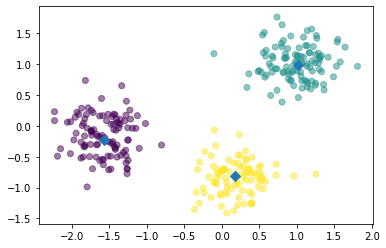

In [4]:

# Assign the columns of new_points: xs and ys
xs = new_points[:,0]
ys = new_points[:,1]

# Make a scatter plot of xs and ys, using labels to define the colors
plt.scatter(xs,ys,c = labels, alpha = 0.5)

# Assign the cluster centers: centroids
centroids = model.cluster_centers_

# Assign the columns of centroids: centroids_x, centroids_y
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]

# Make a scatter plot of centroids_x and centroids_y
plt.scatter(centroids_x,centroids_y, marker = 'D', s=50)
plt.show()

### How many clusters of grain?
In the video, you learned how to choose a good number of clusters for a dataset using the k-means inertia graph. You are given an array samples containing the measurements (such as area, perimeter, length, and several others) of samples of grain. What's a good number of clusters in this case?

KMeans and PyPlot (plt) have already been imported for you.

This dataset was sourced from the UCI Machine Learning Repository.

#### Instructions

- For each of the given values of k, perform the following steps:
- Create a KMeans instance called model with k clusters.
- Fit the model to the grain data samples.
- Append the value of the inertia_ attribute of model to the list inertias.
- The code to plot ks vs inertias has been written for you, so hit 'Submit Answer' to see the plot!

In [5]:
sample = pd.read_csv('seeds.csv', header=None).drop(7, axis=1)
df = pd.read_csv('seeds.csv', header=None)

In [6]:
samples = sample.values

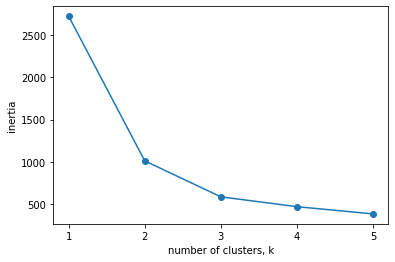

In [7]:
ks = range(1, 6)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model  = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(samples)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [8]:
varieties  = ['Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat']



### Evaluating the grain clustering
In the previous exercise, you observed from the inertia plot that 3 is a good number of clusters for the grain data. In fact, the grain samples come from a mix of 3 different grain varieties: "Kama", "Rosa" and "Canadian". In this exercise, cluster the grain samples into three clusters, and compare the clusters to the grain varieties using a cross-tabulation.

You have the array samples of grain samples, and a list varieties giving the grain variety for each sample. Pandas (pd) and KMeans have already been imported for you.

#### Instructions


- Create a KMeans model called model with 3 clusters.
- Use the .fit_predict() method of model to fit it to samples and derive the cluster labels. Using .fit_predict() is the same as using .fit() followed by .predict().
- Create a DataFrame df with two columns named 'labels' and 'varieties', using labels and varieties, respectively, for the column values. This has been done for you.
- Use the pd.crosstab() function on df['labels'] and df['varieties'] to count the number of times each grain variety coincides with each cluster label. Assign the result to ct.
- Hit 'Submit Answer' to see the cross-tabulation!

In [9]:
# Create a KMeans model with 3 clusters: model
model = KMeans(n_clusters=3)

# Use fit_predict to fit model and obtain cluster labels: labels
labels = model.fit_predict(samples)

# Create a DataFrame with labels and varieties as columns: df
df = pd.DataFrame({'labels': labels, 'varieties': varieties})

# Create crosstab: ct
ct = pd.crosstab(df.labels,df.varieties)

# Display ct
print(ct)


varieties  Canadian wheat  Kama wheat  Rosa wheat
labels                                           
0                      68           9           0
1                       0           1          60
2                       2          60          10


### Scaling fish data for clustering
You are given an array samples giving measurements of fish. Each row represents an individual fish. The measurements, such as weight in grams, length in centimeters, and the percentage ratio of height to length, have very different scales. In order to cluster this data effectively, you'll need to standardize these features first. In this exercise, you'll build a pipeline to standardize and cluster the data.

These fish measurement data were sourced from the Journal of Statistics Education.

#### Instructions

- Import: 
    - make_pipeline from sklearn.pipeline.
    - StandardScaler from sklearn.preprocessing.
    - KMeans from sklearn.cluster.
- Create an instance of StandardScaler called scaler.
- Create an instance of KMeans with 4 clusters called kmeans.
- Create a pipeline called pipeline that chains scaler and kmeans. To do this, you just need to pass them in as arguments to make_pipeline().

In [10]:
# Create scaler: scaler
scaler = StandardScaler()

# Create KMeans instance: kmeans
kmeans = KMeans(n_clusters=4)

# Create pipeline: pipeline
pipeline = make_pipeline(scaler,kmeans)


### Clustering the fish data
You'll now use your standardization and clustering pipeline from the previous exercise to cluster the fish by their measurements, and then create a cross-tabulation to compare the cluster labels with the fish species.

As before, samples is the 2D array of fish measurements. Your pipeline is available as pipeline, and the species of every fish sample is given by the list species.

#### Instructions

- Import pandas as pd.
- Fit the pipeline to the fish measurements samples.
- Obtain the cluster labels for samples by using the .predict() method of pipeline.
- Using pd.DataFrame(), create a DataFrame df with two columns named 'labels' and 'species', using labels and species, respectively, for the column values.
- Using pd.crosstab(), create a cross-tabulation ct of df['labels'] and df['species'].

In [11]:
df = pd.read_csv('fish.csv', header=None)
samples = df.drop(0,axis = 1).values
species = df[0].values

In [12]:
# Fit the pipeline to samples
kmeans.fit(samples)

# Calculate the cluster labels: labels
labels = kmeans.predict(samples)

# Create a DataFrame with labels and species as columns: df
df = pd.DataFrame({'labels': labels , 'species': species})

# Create crosstab: ct
ct = pd.crosstab(df.labels, df.species)

# Display ct
print(ct)

species  Bream  Pike  Roach  Smelt
labels                            
0           13    10      3      0
1            0     4      0      0
2            1     1     17     14
3           20     2      0      0


In [13]:
# Fit the pipeline to samples
pipeline.fit(samples)

# Calculate the cluster labels: labels
labels = pipeline.predict(samples)

# Create a DataFrame with labels and species as columns: df
df = pd.DataFrame({'labels': labels , 'species': species})

# Create crosstab: ct
ct = pd.crosstab(df.labels, df.species)

# Display ct
print(ct)


species  Bream  Pike  Roach  Smelt
labels                            
0            0    17      0      0
1            1     0     19      1
2           33     0      1      0
3            0     0      0     13


### Clustering stocks using KMeans
In this exercise, you'll cluster companies using their daily stock price movements (i.e. the dollar difference between the closing and opening prices for each trading day). You are given a NumPy array movements of daily price movements from 2010 to 2015 (obtained from Yahoo! Finance), where each row corresponds to a company, and each column corresponds to a trading day.

Some stocks are more expensive than others. To account for this, include a Normalizer at the beginning of your pipeline. The Normalizer will separately transform each company's stock price to a relative scale before the clustering begins.

Note that Normalizer() is different to StandardScaler(), which you used in the previous exercise. While StandardScaler() standardizes features (such as the features of the fish data from the previous exercise) by removing the mean and scaling to unit variance, Normalizer() rescales each sample - here, each company's stock price - independently of the other.

KMeans and make_pipeline have already been imported for you.

#### Instructions

- Import Normalizer from sklearn.preprocessing.
- Create an instance of Normalizer called normalizer.
- Create an instance of KMeans called kmeans with 10 clusters.
- Using make_pipeline(), create a pipeline called pipeline that chains normalizer and kmeans.
- Fit the pipeline to the movements array.


In [14]:
df = pd.read_csv('company-stock-movements-2010-2015-incl.csv', index_col=0)
companies = df.index
movements = df.values


In [15]:
# Create a normalizer: normalizer
normalizer = Normalizer()

# Create a KMeans model with 10 clusters: kmeans
kmeans = KMeans(n_clusters=10)

# Make a pipeline chaining normalizer and kmeans: pipeline
pipeline = make_pipeline(normalizer,kmeans)

# Fit pipeline to the daily price movements
pipeline.fit(movements)


Pipeline(memory=None,
         steps=[('normalizer', Normalizer(copy=True, norm='l2')),
                ('kmeans',
                 KMeans(algorithm='auto', copy_x=True, init='k-means++',
                        max_iter=300, n_clusters=10, n_init=10, n_jobs=None,
                        precompute_distances='auto', random_state=None,
                        tol=0.0001, verbose=0))],
         verbose=False)

### Which stocks move together?
In the previous exercise, you clustered companies by their daily stock price movements. So which company have stock prices that tend to change in the same way? You'll now inspect the cluster labels from your clustering to find out.

Your solution to the previous exercise has already been run. Recall that you constructed a Pipeline pipeline containing a KMeans model and fit it to the NumPy array movements of daily stock movements. In addition, a list companies of the company names is available.

#### Instructions

- Import pandas as pd.
- Use the .predict() method of the pipeline to predict the labels for movements.
- Align the cluster labels with the list of company names companies by creating a DataFrame df with labels and companies as columns. This has been done for you.
- Use the .sort_values() method of df to sort the DataFrame by the 'labels' column, and print the result.
- Hit 'Submit Answer' and take a moment to see which companies are together in each cluster!

In [16]:
# Predict the cluster labels: labels
labels = pipeline.predict(movements)

# Create a DataFrame aligning labels and companies: df
df = pd.DataFrame({'labels': labels, 'companies': companies})

# Display df sorted by cluster label
print(df.sort_values('labels'))

    labels                           companies
20       0                          Home Depot
3        0                    American express
30       0                          MasterCard
29       1                     Lookheed Martin
4        1                              Boeing
36       1                    Northrop Grumman
35       2                            Navistar
19       2                     GlaxoSmithKline
37       2                            Novartis
42       2                   Royal Dutch Shell
43       2                                 SAP
44       2                        Schlumberger
13       2                   DuPont de Nemours
46       2                      Sanofi-Aventis
10       2                      ConocoPhillips
47       2                            Symantec
8        2                         Caterpillar
49       2                               Total
6        2            British American Tobacco
52       2                            Unilever
53       2   

## 2. Visualization with hierarchical clustering and t-SNE

In this chapter, you'll learn about two unsupervised learning techniques for data visualization, hierarchical clustering and t-SNE. Hierarchical clustering merges the data samples into ever-coarser clusters, yielding a tree visualization of the resulting cluster hierarchy. t-SNE maps the data samples into 2d space so that the proximity of the samples to one another can be visualized.

### Hierarchical clustering of the grain data
In the video, you learned that the SciPy linkage() function performs hierarchical clustering on an array of samples. Use the linkage() function to obtain a hierarchical clustering of the grain samples, and use dendrogram() to visualize the result. A sample of the grain measurements is provided in the array samples, while the variety of each grain sample is given by the list varieties.

#### Instructions

- Import:
    - linkage and dendrogram from scipy.cluster.hierarchy.
    - matplotlib.pyplot as plt.
- Perform hierarchical clustering on samples using the linkage() function with the method='complete' keyword argument. Assign the result to mergings.
- Plot a dendrogram using the dendrogram() function on mergings. Specify the keyword arguments labels=varieties, leaf_rotation=90, and leaf_font_size=6.

In [17]:
varieties = ['Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat']


samples = np.array([[14.88  , 14.57  ,  0.8811,  5.554 ,  3.333 ,  1.018 ,  4.956 ],
       [14.69  , 14.49  ,  0.8799,  5.563 ,  3.259 ,  3.586 ,  5.219 ],
       [14.03  , 14.16  ,  0.8796,  5.438 ,  3.201 ,  1.717 ,  5.001 ],
       [13.99  , 13.83  ,  0.9183,  5.119 ,  3.383 ,  5.234 ,  4.781 ],
       [14.11  , 14.26  ,  0.8722,  5.52  ,  3.168 ,  2.688 ,  5.219 ],
       [13.02  , 13.76  ,  0.8641,  5.395 ,  3.026 ,  3.373 ,  4.825 ],
       [15.49  , 14.94  ,  0.8724,  5.757 ,  3.371 ,  3.412 ,  5.228 ],
       [16.2   , 15.27  ,  0.8734,  5.826 ,  3.464 ,  2.823 ,  5.527 ],
       [13.5   , 13.85  ,  0.8852,  5.351 ,  3.158 ,  2.249 ,  5.176 ],
       [15.36  , 14.76  ,  0.8861,  5.701 ,  3.393 ,  1.367 ,  5.132 ],
       [15.78  , 14.91  ,  0.8923,  5.674 ,  3.434 ,  5.593 ,  5.136 ],
       [14.46  , 14.35  ,  0.8818,  5.388 ,  3.377 ,  2.802 ,  5.044 ],
       [11.23  , 12.63  ,  0.884 ,  4.902 ,  2.879 ,  2.269 ,  4.703 ],
       [14.34  , 14.37  ,  0.8726,  5.63  ,  3.19  ,  1.313 ,  5.15  ],
       [16.84  , 15.67  ,  0.8623,  5.998 ,  3.484 ,  4.675 ,  5.877 ],
       [17.32  , 15.91  ,  0.8599,  6.064 ,  3.403 ,  3.824 ,  5.922 ],
       [18.72  , 16.19  ,  0.8977,  6.006 ,  3.857 ,  5.324 ,  5.879 ],
       [18.88  , 16.26  ,  0.8969,  6.084 ,  3.764 ,  1.649 ,  6.109 ],
       [18.76  , 16.2   ,  0.8984,  6.172 ,  3.796 ,  3.12  ,  6.053 ],
       [19.31  , 16.59  ,  0.8815,  6.341 ,  3.81  ,  3.477 ,  6.238 ],
       [17.99  , 15.86  ,  0.8992,  5.89  ,  3.694 ,  2.068 ,  5.837 ],
       [18.85  , 16.17  ,  0.9056,  6.152 ,  3.806 ,  2.843 ,  6.2   ],
       [19.38  , 16.72  ,  0.8716,  6.303 ,  3.791 ,  3.678 ,  5.965 ],
       [18.96  , 16.2   ,  0.9077,  6.051 ,  3.897 ,  4.334 ,  5.75  ],
       [18.14  , 16.12  ,  0.8772,  6.059 ,  3.563 ,  3.619 ,  6.011 ],
       [18.65  , 16.41  ,  0.8698,  6.285 ,  3.594 ,  4.391 ,  6.102 ],
       [18.94  , 16.32  ,  0.8942,  6.144 ,  3.825 ,  2.908 ,  5.949 ],
       [17.36  , 15.76  ,  0.8785,  6.145 ,  3.574 ,  3.526 ,  5.971 ],
       [13.32  , 13.94  ,  0.8613,  5.541 ,  3.073 ,  7.035 ,  5.44  ],
       [11.43  , 13.13  ,  0.8335,  5.176 ,  2.719 ,  2.221 ,  5.132 ],
       [12.01  , 13.52  ,  0.8249,  5.405 ,  2.776 ,  6.992 ,  5.27  ],
       [11.34  , 12.87  ,  0.8596,  5.053 ,  2.849 ,  3.347 ,  5.003 ],
       [12.02  , 13.33  ,  0.8503,  5.35  ,  2.81  ,  4.271 ,  5.308 ],
       [12.44  , 13.59  ,  0.8462,  5.319 ,  2.897 ,  4.924 ,  5.27  ],
       [11.55  , 13.1   ,  0.8455,  5.167 ,  2.845 ,  6.715 ,  4.956 ],
       [11.26  , 13.01  ,  0.8355,  5.186 ,  2.71  ,  5.335 ,  5.092 ],
       [12.46  , 13.41  ,  0.8706,  5.236 ,  3.017 ,  4.987 ,  5.147 ],
       [11.81  , 13.45  ,  0.8198,  5.413 ,  2.716 ,  4.898 ,  5.352 ],
       [11.27  , 12.86  ,  0.8563,  5.091 ,  2.804 ,  3.985 ,  5.001 ],
       [12.79  , 13.53  ,  0.8786,  5.224 ,  3.054 ,  5.483 ,  4.958 ],
       [12.67  , 13.32  ,  0.8977,  4.984 ,  3.135 ,  2.3   ,  4.745 ],
       [11.23  , 12.88  ,  0.8511,  5.14  ,  2.795 ,  4.325 ,  5.003 ]])

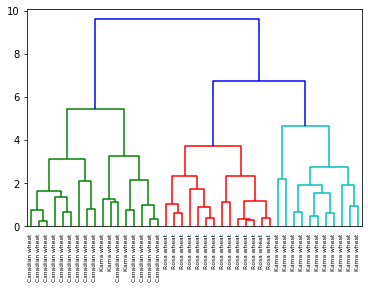

In [18]:
# Calculate the linkage: mergings
mergings = linkage(samples, method='complete')

# Plot the dendrogram, using varieties as labels
dendrogram(mergings,
           labels=varieties,
           leaf_rotation=90,
           leaf_font_size=6)

plt.show()

### Hierarchies of stocks
In chapter 1, you used k-means clustering to cluster companies according to their stock price movements. Now, you'll perform hierarchical clustering of the companies. You are given a NumPy array of price movements movements, where the rows correspond to companies, and a list of the company names companies. SciPy hierarchical clustering doesn't fit into a sklearn pipeline, so you'll need to use the normalize() function from sklearn.preprocessing instead of Normalizer.

linkage and dendrogram have already been imported from scipy.cluster.hierarchy, and PyPlot has been imported as plt.

#### Instructions

- Import normalize from sklearn.preprocessing.
- Rescale the price movements for each stock by using the normalize() function on movements.
- Apply the linkage() function to normalized_movements, using 'complete' linkage, to calculate the hierarchical clustering. Assign the result to mergings.
- Plot a dendrogram of the hierarchical clustering, using the list companies of company names as the labels. In addition, specify the leaf_rotation=90, and leaf_font_size=6 keyword arguments as you did in the previous exercise.

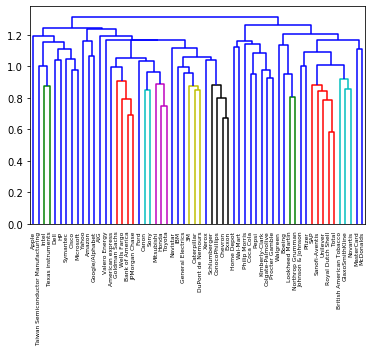

In [19]:

# Normalize the movements: normalized_movements
normalized_movements = normalize(movements)

# Calculate the linkage: mergings
mergings = linkage(normalized_movements, method= 'complete')

# Plot the dendrogram
dendrogram(mergings,
           labels=companies,
           leaf_rotation=90,
           leaf_font_size=6)
plt.show()


### Different linkage, different hierarchical clustering!
In the video, you saw a hierarchical clustering of the voting countries at the Eurovision song contest using 'complete' linkage. Now, perform a hierarchical clustering of the voting countries with 'single' linkage, and compare the resulting dendrogram with the one in the video. Different linkage, different hierarchical clustering!

You are given an array samples. Each row corresponds to a voting country, and each column corresponds to a performance that was voted for. The list country_names gives the name of each voting country. This dataset was obtained from Eurovision.

#### Instructions


- Perform hierarchical clustering on samples using the linkage() function with the method='single' keyword argument. Assign the result to mergings.
- Plot a dendrogram of the hierarchical clustering, using the list country_names as the labels. In addition, specify the leaf_rotation=90, and leaf_font_size=6 keyword arguments as you have done earlier.


In [20]:
samples = np.array([[ 2., 12.,  0.,  0.,  0.,  8.,  0.,  0.,  0.,  0.,  0.,  0.,  1., 0., 10.,  0.,  4.,  0.,  5.,  7.,  0.,  0.,  3.,  0.,  6.,  0.],
       [12.,  0.,  4.,  0.,  0.,  0.,  0.,  6.,  0.,  7.,  8.,  0.,  3., 0.,  0.,  0.,  0.,  5.,  1., 12.,  0.,  0.,  2.,  0., 10.,  0.],
       [ 0., 12.,  3.,  0., 12., 10.,  0.,  0.,  0.,  7.,  0.,  0.,  0., 0.,  0.,  0.,  1.,  6.,  0.,  5.,  0.,  2.,  0.,  0.,  8.,  4.],
       [ 0.,  3., 12.,  0.,  0.,  5.,  0.,  0.,  0.,  1.,  0.,  2.,  0., 0.,  0.,  0.,  0.,  0., 12.,  8.,  4.,  0.,  7.,  6., 10.,  0.],
       [ 0.,  2.,  0., 12.,  0.,  8.,  0.,  0.,  0.,  4.,  1.,  0.,  7., 6.,  0.,  0.,  0.,  5.,  3., 12.,  0.,  0.,  0.,  0., 10.,  0.],
       [ 7.,  1.,  0.,  8.,  0.,  4.,  0.,  0.,  0.,  0.,  0.,  0.,  3., 0.,  0.,  5.,  0.,  0.,  6., 12.,  0.,  0.,  2.,  0., 10.,  0.],
       [ 7.,  4.,  3.,  0., 12.,  5.,  0.,  0.,  0.,  8.,  0.,  0.,  0., 0.,  0.,  0.,  0.,  0., 12.,  6.,  0.,  0.,  1., 10.,  2.,  0.],
       [ 0.,  3.,  5.,  8.,  0.,  2., 10.,  0.,  0.,  4.,  0.,  0.,  1., 0.,  0.,  0.,  0.,  0.,  0.,  6., 12.,  0.,  0.,  0.,  7.,  0.],
       [ 8.,  5.,  4.,  1.,  0., 12.,  0.,  7.,  0.,  0.,  0.,  0.,  0., 2.,  0.,  0.,  0.,  0.,  6., 12.,  0.,  0.,  3.,  0., 10.,  0.],
       [ 0.,  5.,  6.,  0.,  0.,  1., 12.,  0.,  0.,  2.,  0.,  0.,  3., 0.,  0.,  0.,  0.,  0.,  4.,  8., 12.,  0.,  7.,  0., 10.,  0.],
       [ 8.,  5.,  0.,  0.,  0., 12.,  0., 12.,  0.,  6.,  0.,  0.,  4., 0.,  0.,  0.,  3.,  0.,  2., 10.,  0.,  0.,  1.,  0.,  7.,  0.],
       [ 8.,  1.,  4.,  6.,  0.,  5.,  0.,  0., 12.,  0.,  0.,  0.,  3., 0.,  0.,  0.,  0.,  0.,  7., 10.,  0.,  0.,  2.,  0., 12.,  0.],
       [ 0., 10.,  1.,  0.,  8.,  0.,  0.,  0.,  0.,  2.,  0.,  0.,  0., 0.,  0.,  0.,  6.,  0.,  5.,  4.,  0.,  0., 12.,  7.,  3.,  0.],
       [ 0.,  4.,  6.,  0.,  0.,  0.,  0.,  3.,  0.,  2.,  0.,  0.,  0., 0.,  0.,  7.,  5.,  0.,  1., 12.,  0.,  0., 10.,  0.,  8.,  0.],
       [ 7.,  3.,  0.,  0.,  4., 10.,  5.,  0.,  0.,  0.,  0.,  0.,  0., 0.,  1.,  0.,  0.,  0.,  2.,  8., 12.,  0.,  0.,  0.,  6.,  0.],
       [ 0.,  7.,  6.,  0.,  0.,  4.,  0.,  1.,  0.,  3.,  0.,  0.,  0., 0.,  0.,  2.,  0.,  0.,  5.,  8.,  0.,  0., 10.,  0., 12.,  0.],
       [12.,  0.,  8.,  0.,  4.,  5.,  0.,  0.,  0., 12.,  0.,  0.,  0., 3.,  0.,  0.,  0.,  0.,  7.,  6.,  0.,  1.,  2.,  0., 10.,  0.],
       [12.,  1.,  0.,  7.,  0.,  3.,  0.,  0.,  0.,  0., 12.,  0.,  2., 0.,  0.,  6.,  5.,  0.,  4.,  8.,  0.,  0.,  0.,  0., 10.,  0.],
       [ 2.,  5.,  7.,  0.,  0.,  4.,  0.,  0.,  0.,  0.,  0., 12.,  0., 0.,  1.,  0.,  0.,  0., 10., 12.,  0.,  0.,  8.,  3.,  6.,  0.],
       [ 8.,  5.,  1.,  0.,  0.,  7.,  0., 12.,  0.,  4.,  0.,  0.,  2., 0.,  0.,  0.,  0.,  0.,  3., 10.,  0.,  0.,  0.,  0.,  6.,  0.],
       [ 0.,  3.,  6.,  0.,  0.,  4.,  0.,  5.,  0.,  1.,  0.,  0., 12., 0.,  0.,  0.,  0.,  0.,  8., 10.,  0.,  0.,  7.,  2., 12.,  0.],
       [ 0.,  8.,  2.,  1.,  3.,  0.,  0.,  0.,  0.,  5.,  0.,  0.,  0., 0.,  0.,  0.,  4.,  0., 10.,  7.,  0.,  0., 12.,  6.,  0.,  0.],
       [ 0.,  6.,  1.,  0.,  0.,  5.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 0.,  0.,  7., 12.,  0., 10.,  8.,  0.,  0.,  2.,  0.,  4.,  3.],
       [ 6.,  5.,  3.,  2.,  1.,  7.,  0.,  0.,  0., 12.,  0.,  0.,  0., 12.,  0.,  0.,  0.,  0.,  4., 10.,  0.,  0.,  0.,  0.,  8.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  7.,  0.,  6.,  0.,  5.,  3.,  0.,  0., 0., 12.,  0.,  2.,  0., 10.,  8.,  4.,  0.,  0.,  0., 12.,  0.],
       [ 0.,  6.,  4.,  3.,  0.,  1.,  0.,  0.,  0.,  0.,  2.,  0.,  0., 0.,  0., 12.,  8.,  0.,  5., 12.,  0.,  0.,  7.,  0., 10.,  0.],
       [ 0.,  5.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  3.,  4.,  0.,  2., 0.,  0., 12., 12.,  0.,  6.,  8.,  0.,  0.,  7.,  0., 10.,  0.],
       [ 0., 12.,  0.,  6.,  0.,  8.,  0.,  0.,  0.,  2.,  0.,  0.,  5., 0.,  7.,  0.,  0., 12.,  0., 10.,  0.,  0.,  0.,  3.,  4.,  1.],
       [ 7.,  5.,  4.,  8.,  0.,  2.,  0.,  0.,  0.,  6.,  0.,  0.,  0., 0.,  0.,  1.,  3.,  0.,  0., 12.,  0.,  0.,  0.,  0., 10.,  0.],
       [ 0.,  0.,  0.,  7.,  0.,  5.,  6.,  0.,  0.,  1.,  0.,  0.,  3., 0.,  4.,  0.,  2.,  0.,  0., 10., 12.,  0.,  0.,  0.,  8.,  0.],
       [ 0.,  8.,  0.,  0.,  2.,  5.,  0.,  0.,  0.,  1.,  0.,  0.,  0., 0.,  0.,  3., 12.,  0., 10.,  6.,  0.,  0.,  7.,  0.,  4.,  0.],
       [ 2.,  7.,  4.,  0.,  0.,  3.,  0.,  1.,  0.,  0.,  0.,  0.,  6., 0.,  0.,  5.,  0.,  0., 12.,  8.,  0.,  0., 10.,  0., 12.,  0.],
       [12.,  4.,  8.,  6.,  0.,  0.,  0.,  7.,  0.,  3.,  0.,  0.,  0., 0.,  0.,  1.,  0.,  0.,  5., 12.,  0.,  0.,  2.,  0., 10.,  0.],
       [ 2.,  5.,  0.,  0.,  0.,  3.,  0.,  0.,  0.,  0.,  0.,  0.,  1., 0.,  0.,  6.,  8.,  0.,  7., 10.,  0.,  0.,  4.,  0., 12.,  0.],
       [ 2.,  6.,  0.,  0.,  5.,  8.,  4.,  3.,  0.,  0.,  0.,  0., 10., 0.,  0.,  0.,  0.,  0.,  0., 12., 12.,  0.,  1.,  0.,  7.,  0.],
       [ 0.,  3.,  6.,  0.,  0.,  2.,  8.,  0.,  0.,  0.,  0.,  0.,  0., 0.,  1.,  0.,  0.,  0.,  4., 10., 12.,  0.,  5.,  0.,  7.,  0.],
       [ 6.,  4.,  2.,  0.,  0., 12.,  0.,  0.,  0., 10.,  0.,  0.,  0., 0.,  3.,  0.,  0.,  0.,  5.,  8.,  0., 12.,  1.,  0.,  7.,  0.],
       [ 0., 12.,  5.,  0.,  0.,  4.,  0.,  0.,  0.,  3.,  0.,  0.,  0., 0.,  0.,  0.,  6.,  0., 10.,  8.,  0.,  1., 12.,  2.,  7.,  0.],
       [ 0.,  1., 10.,  0.,  0.,  0.,  0.,  0.,  0.,  3.,  0.,  8.,  0., 0.,  7.,  0.,  0.,  0.,  5.,  6., 12.,  2.,  0.,  0.,  4.,  0.],
       [ 8.,  5.,  6.,  0., 12.,  1.,  0.,  0.,  0.,  4.,  0.,  0.,  0., 0.,  0.,  0.,  0.,  0., 10.,  3.,  0.,  0.,  2., 12.,  7.,  0.],
       [ 7.,  4.,  0., 10.,  0.,  2.,  0.,  0.,  0.,  0.,  6.,  0.,  0., 0.,  0.,  5.,  3.,  0.,  8., 12.,  0.,  0.,  1.,  0., 12.,  0.],
       [ 0.,  6.,  0.,  0.,  0.,  8.,  0.,  2.,  0.,  0.,  0.,  0.,  0., 0.,  0.,  3., 12.,  0., 10.,  7.,  0.,  4.,  1.,  0.,  5., 12.]])

country_names = ['Albania', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Belarus', 'Belgium', 'Bosnia & Herzegovina', 'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia', 'F.Y.R. Macedonia', 'Finland', 'France', 'Georgia', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Israel', 'Italy', 'Latvia', 'Lithuania', 'Malta', 'Moldova','Montenegro', 'Norway', 'Poland', 'Russia', 'San Marino', 'Serbia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'The Netherlands', 'Ukraine', 'United Kingdom']

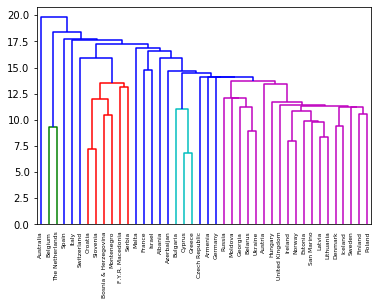

In [21]:
# Calculate the linkage: mergings
mergings = linkage(samples, method = 'single')


# Plot the dendrogram
dendrogram(mergings,
           labels=country_names,
           leaf_rotation=90,
           leaf_font_size=6)
plt.show()


### Extracting the cluster labels
In the previous exercise, you saw that the intermediate clustering of the grain samples at height 6 has 3 clusters. Now, use the fcluster() function to extract the cluster labels for this intermediate clustering, and compare the labels with the grain varieties using a cross-tabulation.

The hierarchical clustering has already been performed and mergings is the result of the linkage() function. The list varieties gives the variety of each grain sample.

#### Instructions

- Perform a flat hierarchical clustering by using the fcluster() function on mergings. Specify a maximum height of 6 and the keyword argument criterion='distance'.
- Create a DataFrame df with two columns named 'labels' and 'varieties', using labels and varieties, respectively, for the column values. This has been done for you.
- Create a cross-tabulation ct between df['labels'] and df['varieties'] to count the number of times each grain variety coincides with each cluster label.

In [22]:
varieties = ['Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat']


samples = np.array([[14.88  , 14.57  ,  0.8811,  5.554 ,  3.333 ,  1.018 ,  4.956 ],
       [14.69  , 14.49  ,  0.8799,  5.563 ,  3.259 ,  3.586 ,  5.219 ],
       [14.03  , 14.16  ,  0.8796,  5.438 ,  3.201 ,  1.717 ,  5.001 ],
       [13.99  , 13.83  ,  0.9183,  5.119 ,  3.383 ,  5.234 ,  4.781 ],
       [14.11  , 14.26  ,  0.8722,  5.52  ,  3.168 ,  2.688 ,  5.219 ],
       [13.02  , 13.76  ,  0.8641,  5.395 ,  3.026 ,  3.373 ,  4.825 ],
       [15.49  , 14.94  ,  0.8724,  5.757 ,  3.371 ,  3.412 ,  5.228 ],
       [16.2   , 15.27  ,  0.8734,  5.826 ,  3.464 ,  2.823 ,  5.527 ],
       [13.5   , 13.85  ,  0.8852,  5.351 ,  3.158 ,  2.249 ,  5.176 ],
       [15.36  , 14.76  ,  0.8861,  5.701 ,  3.393 ,  1.367 ,  5.132 ],
       [15.78  , 14.91  ,  0.8923,  5.674 ,  3.434 ,  5.593 ,  5.136 ],
       [14.46  , 14.35  ,  0.8818,  5.388 ,  3.377 ,  2.802 ,  5.044 ],
       [11.23  , 12.63  ,  0.884 ,  4.902 ,  2.879 ,  2.269 ,  4.703 ],
       [14.34  , 14.37  ,  0.8726,  5.63  ,  3.19  ,  1.313 ,  5.15  ],
       [16.84  , 15.67  ,  0.8623,  5.998 ,  3.484 ,  4.675 ,  5.877 ],
       [17.32  , 15.91  ,  0.8599,  6.064 ,  3.403 ,  3.824 ,  5.922 ],
       [18.72  , 16.19  ,  0.8977,  6.006 ,  3.857 ,  5.324 ,  5.879 ],
       [18.88  , 16.26  ,  0.8969,  6.084 ,  3.764 ,  1.649 ,  6.109 ],
       [18.76  , 16.2   ,  0.8984,  6.172 ,  3.796 ,  3.12  ,  6.053 ],
       [19.31  , 16.59  ,  0.8815,  6.341 ,  3.81  ,  3.477 ,  6.238 ],
       [17.99  , 15.86  ,  0.8992,  5.89  ,  3.694 ,  2.068 ,  5.837 ],
       [18.85  , 16.17  ,  0.9056,  6.152 ,  3.806 ,  2.843 ,  6.2   ],
       [19.38  , 16.72  ,  0.8716,  6.303 ,  3.791 ,  3.678 ,  5.965 ],
       [18.96  , 16.2   ,  0.9077,  6.051 ,  3.897 ,  4.334 ,  5.75  ],
       [18.14  , 16.12  ,  0.8772,  6.059 ,  3.563 ,  3.619 ,  6.011 ],
       [18.65  , 16.41  ,  0.8698,  6.285 ,  3.594 ,  4.391 ,  6.102 ],
       [18.94  , 16.32  ,  0.8942,  6.144 ,  3.825 ,  2.908 ,  5.949 ],
       [17.36  , 15.76  ,  0.8785,  6.145 ,  3.574 ,  3.526 ,  5.971 ],
       [13.32  , 13.94  ,  0.8613,  5.541 ,  3.073 ,  7.035 ,  5.44  ],
       [11.43  , 13.13  ,  0.8335,  5.176 ,  2.719 ,  2.221 ,  5.132 ],
       [12.01  , 13.52  ,  0.8249,  5.405 ,  2.776 ,  6.992 ,  5.27  ],
       [11.34  , 12.87  ,  0.8596,  5.053 ,  2.849 ,  3.347 ,  5.003 ],
       [12.02  , 13.33  ,  0.8503,  5.35  ,  2.81  ,  4.271 ,  5.308 ],
       [12.44  , 13.59  ,  0.8462,  5.319 ,  2.897 ,  4.924 ,  5.27  ],
       [11.55  , 13.1   ,  0.8455,  5.167 ,  2.845 ,  6.715 ,  4.956 ],
       [11.26  , 13.01  ,  0.8355,  5.186 ,  2.71  ,  5.335 ,  5.092 ],
       [12.46  , 13.41  ,  0.8706,  5.236 ,  3.017 ,  4.987 ,  5.147 ],
       [11.81  , 13.45  ,  0.8198,  5.413 ,  2.716 ,  4.898 ,  5.352 ],
       [11.27  , 12.86  ,  0.8563,  5.091 ,  2.804 ,  3.985 ,  5.001 ],
       [12.79  , 13.53  ,  0.8786,  5.224 ,  3.054 ,  5.483 ,  4.958 ],
       [12.67  , 13.32  ,  0.8977,  4.984 ,  3.135 ,  2.3   ,  4.745 ],
       [11.23  , 12.88  ,  0.8511,  5.14  ,  2.795 ,  4.325 ,  5.003 ]])

In [23]:
# Calculate the linkage: mergings
mergings = linkage(samples, method='complete')

# Use fcluster to extract labels: labels
labels = fcluster(mergings,6 , criterion='distance' )

# Create a DataFrame with labels and varieties as columns: df
df = pd.DataFrame({'labels': labels, 'varieties': varieties})

# Create crosstab: ct
ct = pd.crosstab(df.labels,df.varieties)

# Display ct
print(ct)

varieties  Canadian wheat  Kama wheat  Rosa wheat
labels                                           
1                      14           3           0
2                       0           0          14
3                       0          11           0



### t-SNE visualization of grain dataset
In the video, you saw t-SNE applied to the iris dataset. In this exercise, you'll apply t-SNE to the grain samples data and inspect the resulting t-SNE features using a scatter plot. You are given an array samples of grain samples and a list variety_numbers giving the variety number of each grain sample.

#### Instructions

- Import TSNE from sklearn.manifold.
- Create a TSNE instance called model with learning_rate=200.
- Apply the .fit_transform() method of model to samples. Assign the result to tsne_features.
- Select the column 0 of tsne_features. Assign the result to xs.
- Select the column 1 of tsne_features. Assign the result to ys.
- Make a scatter plot of the t-SNE features xs and ys. To color the points by the grain variety, specify the additional keyword argument c=variety_numbers.

In [24]:
sample = pd.read_csv('seeds.csv', header=None).drop(7, axis=1)
df = pd.read_csv('seeds.csv', header=None)
samples = sample.values
variety_numbers = df[7].values

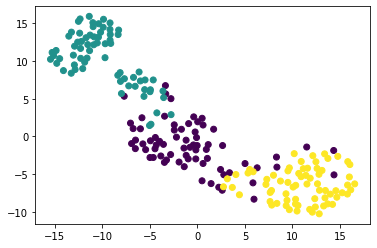

In [25]:
# Create a TSNE instance: model
model = TSNE(learning_rate=200)

# Apply fit_transform to samples: tsne_features
tsne_features = model.fit_transform(samples)

# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1st feature: ys
ys = tsne_features[:,1]

# Scatter plot, coloring by variety_numbers
plt.scatter(xs,ys,c = variety_numbers)
plt.show()

### A t-SNE map of the stock market
t-SNE provides great visualizations when the individual samples can be labeled. In this exercise, you'll apply t-SNE to the company stock price data. A scatter plot of the resulting t-SNE features, labeled by the company names, gives you a map of the stock market! The stock price movements for each company are available as the array normalized_movements (these have already been normalized for you). The list companies gives the name of each company. PyPlot (plt) has been imported for you.

#### Instructions

- Import TSNE from sklearn.manifold.
- Create a TSNE instance called model with learning_rate=50.
- Apply the .fit_transform() method of model to normalized_movements. Assign the result to tsne_features.
- Select column 0 and column 1 of tsne_features.
- Make a scatter plot of the t-SNE features xs and ys. Specify the additional keyword argument alpha=0.5.
- Code to label each point with its company name has been written for you using plt.annotate(), so just hit 'Submit Answer' to see the visualization!

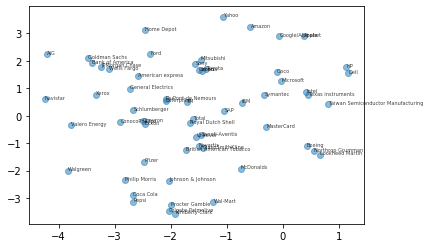

In [26]:
# Create a TSNE instance: model
model = TSNE(learning_rate = 50  )

# Apply fit_transform to normalized_movements: tsne_features
tsne_features = model.fit_transform(normalized_movements)

# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1th feature: ys
ys = tsne_features[:,1]

# Scatter plot
plt.scatter(xs,ys,alpha=0.5, )

# Annotate the points
for x, y, company in zip(xs, ys, companies):
    plt.annotate(company, (x, y), fontsize=5, alpha=0.75)
plt.show()

## Visualizing the PCA transformation
Dimension reduction summarizes a dataset using its common occuring patterns. In this chapter, you'll learn about the most fundamental of dimension reduction techniques, "Principal Component Analysis" ("PCA"). PCA is often used before supervised learning to improve model performance and generalization. It can also be useful for unsupervised learning. For example, you'll employ a variant of PCA will allow you to cluster Wikipedia articles by their content!


### Correlated data in nature
You are given an array grains giving the width and length of samples of grain. You suspect that width and length will be correlated. To confirm this, make a scatter plot of width vs length and measure their Pearson correlation.

#### Instructions
- Assign column 0 of grains to width and column 1 of grains to length.
- Make a scatter plot with width on the x-axis and length on the y-axis.
- Use the pearsonr() function to calculate the Pearson correlation of width and length.

In [27]:
sample.head()
grains = sample[[4,3]].values

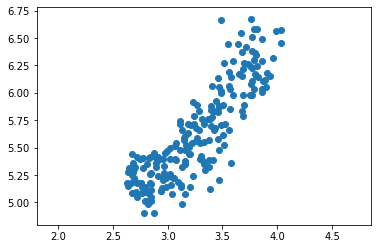

0.8604149377143466


In [28]:
# Assign the 0th column of grains: width
width = grains[:,0]

# Assign the 1st column of grains: length
length = grains[:,1]

# Scatter plot width vs length
plt.scatter(width, length)
plt.axis('equal')
plt.show()

# Calculate the Pearson correlation
correlation, pvalue = pearsonr(width,length)

# Display the correlation
print(correlation)

### Decorrelating the grain measurements with PCA
You observed in the previous exercise that the width and length measurements of the grain are correlated. Now, you'll use PCA to decorrelate these measurements, then plot the decorrelated points and measure their Pearson correlation.

#### Instructions

- Create an instance of PCA called model.
- Use the .fit_transform() method of model to apply the PCA transformation to grains. Assign the result to pca_features.
- The subsequent code to extract, plot, and compute the Pearson correlation of the first two columns pca_features has been written for you, so hit 'Submit Answer' to see the result!

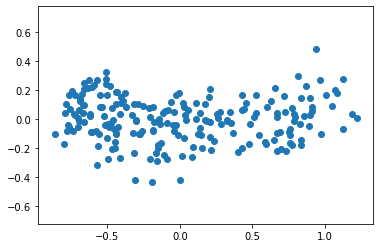

1.0408340855860843e-16


In [29]:
# Create PCA instance: model
model = PCA()

# Apply the fit_transform method of model to grains: pca_features
pca_features = model.fit_transform(grains)

# Assign 0th column of pca_features: xs
xs = pca_features[:,0]

# Assign 1st column of pca_features: ys
ys = pca_features[:,1]

# Scatter plot xs vs ys
plt.scatter(xs, ys)
plt.axis('equal')
plt.show()

# Calculate the Pearson correlation of xs and ys
correlation, pvalue = pearsonr(xs, ys)

# Display the correlation
print(correlation)

### The first principal component
The first principal component of the data is the direction in which the data varies the most. In this exercise, your job is to use PCA to find the first principal component of the length and width measurements of the grain samples, and represent it as an arrow on the scatter plot.

The array grains gives the length and width of the grain samples. PyPlot (plt) and PCA have already been imported for you.

#### Instructions

- Make a scatter plot of the grain measurements. This has been done for you.
- Create a PCA instance called model.
- Fit the model to the grains data.
- Extract the coordinates of the mean of the data using the .mean_ attribute of model.
- Get the first principal component of model using the .components_[0,:] attribute.
- Plot the first principal component as an arrow on the scatter plot, using the plt.arrow() function. You have to specify the first two arguments - mean[0] and mean[1].

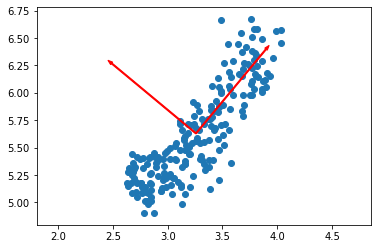

In [30]:
# Make a scatter plot of the untransformed points
plt.scatter(grains[:,0], grains[:,1])

# Create a PCA instance: model
model = PCA()

# Fit model to points
model.fit(grains)

# Get the mean of the grain samples: mean
mean = model.mean_

# Get the first principal component: first_pc
first_pc = model.components_[0,:]
second_pc = model.components_[1,:]

# Plot first_pc as an arrow, starting at mean
plt.arrow(mean[0], mean[1], first_pc[0], first_pc[1], color='red', width=0.01)
plt.arrow(mean[0], mean[1], second_pc[0], second_pc[1], color='red', width=0.01)

# Keep axes on same scale
plt.axis('equal')
plt.show()

### Variance of the PCA features
The fish dataset is 6-dimensional. But what is its intrinsic dimension? Make a plot of the variances of the PCA features to find out. As before, samples is a 2D array, where each row represents a fish. You'll need to standardize the features first.

#### Instructions

- Create an instance of StandardScaler called scaler.
- Create a PCA instance called pca.
- Use the make_pipeline() function to create a pipeline chaining scaler and pca.
- Use the .fit() method of pipeline to fit it to the fish samples samples.
- Extract the number of components used using the .n_components_ attribute of pca. Place this inside a range() function and store the result as features.
- Use the plt.bar() function to plot the explained variances, with features on the x-axis and pca.explained_variance_ on the y-axis.

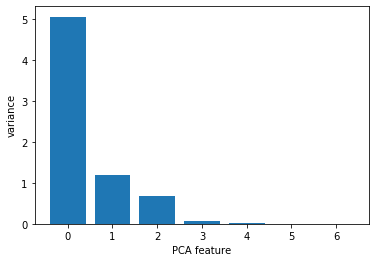

In [31]:

# Create scaler: scaler
scaler = StandardScaler()

# Create a PCA instance: pca
pca = PCA()

# Create pipeline: pipeline
pipeline = make_pipeline(scaler,pca)

# Fit the pipeline to 'samples'
pipeline.fit(samples)

# Plot the explained variances
features =range( pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()


### Dimension reduction of the fish measurements
In a previous exercise, you saw that 2 was a reasonable choice for the "intrinsic dimension" of the fish measurements. Now use PCA for dimensionality reduction of the fish measurements, retaining only the 2 most important components.

The fish measurements have already been scaled for you, and are available as scaled_samples.

#### Instructions

- Create a PCA instance called pca with n_components=2.
- Use the .fit() method of pca to fit it to the scaled fish measurements scaled_samples.
- Use the .transform() method of pca to transform the scaled_samples. Assign the result to pca_features.

In [32]:
df = pd.read_csv('fish.csv', header=None)
samples = df.drop(0,axis = 1).values
species = df[0].values

In [33]:
scaled_samples = np.array([[-0.50109735, -0.36878558, -0.34323399, -0.23781518,  1.0032125 ,
         0.25373964],
       [-0.37434344, -0.29750241, -0.26893461, -0.14634781,  1.15869615,
         0.44376493],
       [-0.24230812, -0.30641281, -0.25242364, -0.15397009,  1.13926069,
         1.0613471 ],
       [-0.18157187, -0.09256329, -0.04603648,  0.02896467,  0.96434159,
         0.20623332],
       [-0.00464454, -0.0747425 , -0.04603648,  0.06707608,  0.8282934 ,
         1.0613471 ],
       [ 0.04816959, -0.04801131,  0.01175193,  0.12043205,  1.08095432,
         0.63379021],
       [ 0.18020491, -0.04801131,  0.01175193,  0.10518748,  1.26559115,
         1.15635974],
       [-0.11027279,  0.02327186,  0.03651839,  0.14329889,  0.78942248,
         0.25373964],
       [ 0.04816959,  0.02327186,  0.03651839,  0.15092117,  1.14897842,
         0.44376493],
       [ 0.18020491,  0.10346543,  0.09430679,  0.23476627,  1.09067205,
         0.39625861],
       [ 0.11418725,  0.09455503,  0.11907325,  0.23476627,  1.10038978,
         0.58628389],
       [ 0.18020491,  0.12128622,  0.11907325,  0.23476627,  1.12954296,
         0.20623332],
       [ 0.18020491,  0.1569278 ,  0.16035069,  0.25001083,  0.94490613,
        -0.41134885],
       [ 0.44427556,  0.18365899,  0.20162812,  0.31098909,  1.1781316 ,
         0.49127125],
       [ 0.44427556,  0.18365899,  0.20162812,  0.31098909,  1.30446206,
         1.01384078],
       [ 0.7083462 ,  0.27276296,  0.28418298,  0.39483418,  1.04208341,
         0.44376493],
       [ 0.7083462 ,  0.27276296,  0.28418298,  0.41007875,  1.04208341,
         0.30124596],
       [ 0.47068262,  0.31731494,  0.32546042,  0.41770103,  1.20728478,
         0.20623332],
       [ 0.57631088,  0.32622533,  0.32546042,  0.42532331,  0.90603522,
         0.91882813],
       [ 0.3782579 ,  0.35295652,  0.36673785,  0.48630156,  0.99349477,
         0.58628389],
       [ 0.66873561,  0.36186692,  0.36673785,  0.46343472,  1.23643797,
         0.39625861],
       [ 0.49708969,  0.37077732,  0.40801528,  0.50154612,  1.07123659,
         0.20623332],
       [ 0.65553208,  0.3975085 ,  0.44929271,  0.57014666,  0.97405931,
         1.0613471 ],
       [ 0.7083462 ,  0.4064189 ,  0.44929271,  0.56252438,  1.16841387,
         0.44376493],
       [ 0.77436387,  0.3975085 ,  0.44929271,  0.5930135 ,  1.15869615,
         0.91882813],
       [ 0.76116033,  0.4153293 ,  0.44929271,  0.57014666,  1.18784933,
         1.01384078],
       [ 0.74531609,  0.47770207,  0.53184758,  0.63874719,  1.13926069,
         0.58628389],
       [ 1.10445217,  0.48661247,  0.53184758,  0.64636947,  1.21700251,
         0.96633446],
       [ 1.50055814,  0.54898524,  0.61440245,  0.72259229,  1.5959939 ,
         1.25137238],
       [ 1.28930162,  0.68264119,  0.73823474,  0.83692651,  1.2461557 ,
         0.68129653],
       [ 1.38172635,  0.68264119,  0.73823474,  0.82930423,  1.26559115,
         0.68129653],
       [ 1.30250516,  0.78956594,  0.82078961,  0.92839389,  1.29474434,
         0.96633446],
       [ 1.43454048,  0.8964907 ,  0.94462191,  0.97412758,  1.21700251,
         0.87132181],
       [ 1.36852282,  0.94995308,  0.94462191,  1.01986127,  0.95462386,
         0.39625861],
       [-1.03452005, -1.2865564 , -1.27610397, -1.28969003, -0.24065667,
         0.53877757],
       [-0.95793956, -0.96578213, -0.93762902, -0.97717649, -0.19206803,
         0.49127125],
       [-0.93417321, -0.87667817, -0.8880961 , -0.90857596, -0.17263258,
         0.39625861],
       [-0.91040685, -0.8143054 , -0.80554124, -0.83235314, -0.26980986,
         0.68129653],
       [-0.82326354, -0.77866381, -0.78903027, -0.83235314, -0.0074312 ,
         1.5364103 ],
       [-1.14014831, -0.74302223, -0.74775283, -0.78661945,  0.03143971,
         0.87132181],
       [-0.8496706 , -0.73411183, -0.72298637, -0.76375261, -0.13376167,
         0.87132181],
       [-0.82326354, -0.70738064, -0.7064754 , -0.71801892, -0.22122122,
         0.49127125],
       [-0.74404234, -0.61827668, -0.62392054, -0.6417961 , -0.44472896,
         1.10885342],
       [-0.75724587, -0.60936628, -0.62392054, -0.67228523, -0.0754553 ,
         0.82381549],
       [-0.71763528, -0.60936628, -0.5826431 , -0.59606241, -0.02686666,
         1.0613471 ],
       [-0.77044941, -0.5648143 , -0.5826431 , -0.61892926, -0.18235031,
         0.20623332],
       [-0.71763528, -0.5559039 , -0.5826431 , -0.61892926, -0.24065667,
         1.10885342],
       [-0.69386892, -0.47571034, -0.4588108 , -0.45123907, -0.03658439,
         0.58628389],
       [-0.71499457, -0.47571034, -0.50834372, -0.48935047, -0.21150349,
         0.34875228],
       [-0.61200702, -0.46679994, -0.50008824, -0.48172819, -0.04630212,
         1.20386606],
       [-0.66482115, -0.33314399, -0.35974497, -0.39788309, -0.26009213,
         0.53877757],
       [-0.37434344, -0.29750241, -0.29370107, -0.29879344,  0.22579427,
         1.20386606],
       [-0.42187616, -0.20839845, -0.21114621, -0.19208149, -0.0074312 ,
         1.2988787 ],
       [-0.11027279,  0.19256939,  0.17686166,  0.14329889, -0.09489075,
         1.15635974],
       [-1.12245558, -1.60733067, -1.63108989, -1.70129323, -1.16384082,
        -1.50399423],
       [-1.12034301, -1.5449579 , -1.57330149, -1.64031498, -1.07638127,
        -1.36147526],
       [-1.12166336, -1.5360475 , -1.565046  , -1.64031498, -1.28045356,
        -1.40898159],
       [-1.11453346, -1.50931631, -1.53202405, -1.60982586, -0.95005081,
        -0.64888045],
       [-1.11426939, -1.48258512, -1.51551308, -1.57933673, -1.09581673,
        -1.2189563 ],
       [-1.11717416, -1.47367473, -1.5072576 , -1.56409217, -1.20271174,
        -1.26646262],
       [-1.11374125, -1.42912274, -1.46598016, -1.52598076, -1.086099  ,
        -1.45648791],
       [-1.11400532, -1.42912274, -1.46598016, -1.52598076, -1.086099  ,
        -1.88404479],
       [-1.11426939, -1.42021235, -1.44946919, -1.51835848, -1.10553446,
        -1.97905744],
       [-1.10793169, -1.41130195, -1.43295822, -1.50311391, -1.21242946,
        -1.17144998],
       [-1.10476284, -1.39348116, -1.41644724, -1.49549163, -0.97920399,
        -1.64651319],
       [-1.10793169, -1.35783957, -1.36691432, -1.47262479, -1.12496991,
        -1.78903215],
       [-1.08812639, -1.25982521, -1.259593  , -1.36591285, -0.89174444,
         0.34875228],
       [-1.08759825, -1.20636284, -1.20180459, -1.28969003, -0.96948627,
        -0.60137413],
       [-0.61200702,  0.23712137,  0.22639458,  0.12805433, -1.17355855,
        -1.50399423],
       [-0.34793638,  0.38859811,  0.36673785,  0.35672277, -1.2610181 ,
        -0.88641206],
       [-0.34793638,  0.47770207,  0.44929271,  0.43294559, -1.24158265,
        -0.74389309],
       [-0.34793638,  0.6648204 ,  0.6391689 ,  0.5091684 , -1.19299401,
        -1.31396894],
       [-0.00464454,  0.72719317,  0.69695731,  0.56252438, -0.97920399,
        -0.74389309],
       [-0.22910458,  0.77174515,  0.73823474,  0.60063578, -1.21242946,
        -1.50399423],
       [ 0.06401383,  1.128161  ,  1.0684542 ,  0.94363845, -1.17355855,
        -1.59900687],
       [ 0.20661198,  1.128161  ,  1.0684542 ,  0.94363845, -1.27073583,
        -1.45648791],
       [ 0.28583317,  1.1370714 ,  1.10973164,  0.9665053 , -1.07638127,
        -0.79139942],
       [ 0.18020491,  1.30636893,  1.27484137,  1.13419549, -1.31932447,
        -1.26646262],
       [ 0.35713225,  1.41329369,  1.35739623,  1.18755146, -1.17355855,
        -1.36147526],
       [ 0.89319566,  1.55586003,  1.52250596,  1.3781085 , -1.27073583,
        -1.12394366],
       [ 1.36852282,  1.8677239 ,  1.82795897,  1.67537748, -1.1541231 ,
        -0.79139942],
       [ 2.16073475,  2.19740857,  2.18294489,  2.02600243, -0.98892172,
        -0.55386781],
       [ 3.08498201,  2.55382442,  2.51316435,  2.35376053, -1.27073583,
        -1.55150055],
       [ 2.95294669,  2.55382442,  2.51316435,  2.35376053, -1.27073583,
        -1.55150055],
       [ 3.21701733,  2.82113631,  2.79385089,  2.65865179, -1.18327628,
        -0.88641206]])

In [34]:
# Create a PCA model with 2 components: pca
pca = PCA(n_components=2)

# Fit the PCA instance to the scaled samples
pca.fit(scaled_samples)

# Transform the scaled samples: pca_features
pca_features = pca.transform(scaled_samples)

# Print the shape of pca_features
print(pca_features.shape)



(85, 2)


### A tf-idf word-frequency array
In this exercise, you'll create a tf-idf word frequency array for a toy collection of documents. For this, use the TfidfVectorizer from sklearn. It transforms a list of documents into a word frequency array, which it outputs as a csr_matrix. It has fit() and transform() methods like other sklearn objects.

You are given a list documents of toy documents about pets. Its contents have been printed in the IPython Shell.

#### Instructions

- Import TfidfVectorizer from sklearn.feature_extraction.text.
- Create a TfidfVectorizer instance called tfidf.
- Apply .fit_transform() method of tfidf to documents and assign the result to csr_mat. This is a word-frequency array in csr_matrix format.
- Inspect csr_mat by calling its .toarray() method and printing the result. This has been done for you.
- The columns of the array correspond to words. Get the list of words by calling the .get_feature_names() method of tfidf, and assign the result to words.

In [35]:
documents = ['cats say meow', 'dogs say woof', 'dogs chase cats']
# Create a TfidfVectorizer: tfidf
tfidf = TfidfVectorizer() 

# Apply fit_transform to document: csr_mat
csr_mat = tfidf.fit_transform(documents)

# Print result of toarray() method
print(csr_mat.toarray())

# Get the words: words
words = tfidf.get_feature_names()

# Print words
print(words)

[[0.51785612 0.         0.         0.68091856 0.51785612 0.        ]
 [0.         0.         0.51785612 0.         0.51785612 0.68091856]
 [0.51785612 0.68091856 0.51785612 0.         0.         0.        ]]
['cats', 'chase', 'dogs', 'meow', 'say', 'woof']


### Clustering Wikipedia part I
You saw in the video that TruncatedSVD is able to perform PCA on sparse arrays in csr_matrix format, such as word-frequency arrays. Combine your knowledge of TruncatedSVD and k-means to cluster some popular pages from Wikipedia. In this exercise, build the pipeline. In the next exercise, you'll apply it to the word-frequency array of some Wikipedia articles.

Create a Pipeline object consisting of a TruncatedSVD followed by KMeans. (This time, we've precomputed the word-frequency matrix for you, so there's no need for a TfidfVectorizer).

The Wikipedia dataset you will be working with was obtained from here.

#### Instructions

- Create a TruncatedSVD instance called svd with n_components=50.
- Create a KMeans instance called kmeans with n_clusters=6.
- Create a pipeline called pipeline consisting of svd and kmeans.

In [36]:
# Create a TruncatedSVD instance: svd
svd = TruncatedSVD(n_components=50)

# Create a KMeans instance: kmeans
kmeans = KMeans(n_clusters=6)

# Create a pipeline: pipeline
pipeline = make_pipeline(svd,kmeans)